In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\Data sets\employee_data\employee_data.csv')

# Display the first few rows of the dataset
df.head()


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


# Exploratory Data Analysis (EDA) on Employee Data

This notebook provides a comprehensive EDA on the provided `employee_data.csv` dataset. The goal is to understand the dataset's structure, identify patterns, and prepare it for further analysis or modeling.

## 1. Import Libraries

We start by importing the necessary libraries for data manipulation and visualization.

## 2. Load Dataset

The dataset is loaded into a Pandas DataFrame for analysis. The first few rows are displayed to give an overview of the dataset.


In [4]:
# Check the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Get information about the dataset
df.info()


The dataset contains 3000 rows and 26 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  T

In [5]:
# Display summary statistics of the dataset
df.describe()

,EmpID,LocationCode,Current Employee Rating
count,3000.000000,3000.000000,3000.000000
mean,2500.500000,44997.180667,2.969000
std,866.169729,29987.331783,1.015078
min,1001.000000,1013.000000,1.000000
25%,1750.750000,17546.000000,2.000000
50%,2500.500000,44150.500000,3.000000
75%,3250.250000,71481.250000,3.000000
max,4000.000000,98052.000000,5.000000


## 3. Data Overview

### Shape of the Dataset

We check the number of rows and columns to get an understanding of the dataset's size.

### Data Information

The `info()` method provides a concise summary of the dataset, including data types and non-null values.

### Summary Statistics

The `describe()` method generates descriptive statistics, such as mean, median, and standard deviation, for numerical columns.


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print("Columns with missing values and their count:")
print(missing_values)


Columns with missing values and their count:
ExitDate                  1467
TerminationDescription    1467
dtype: int64


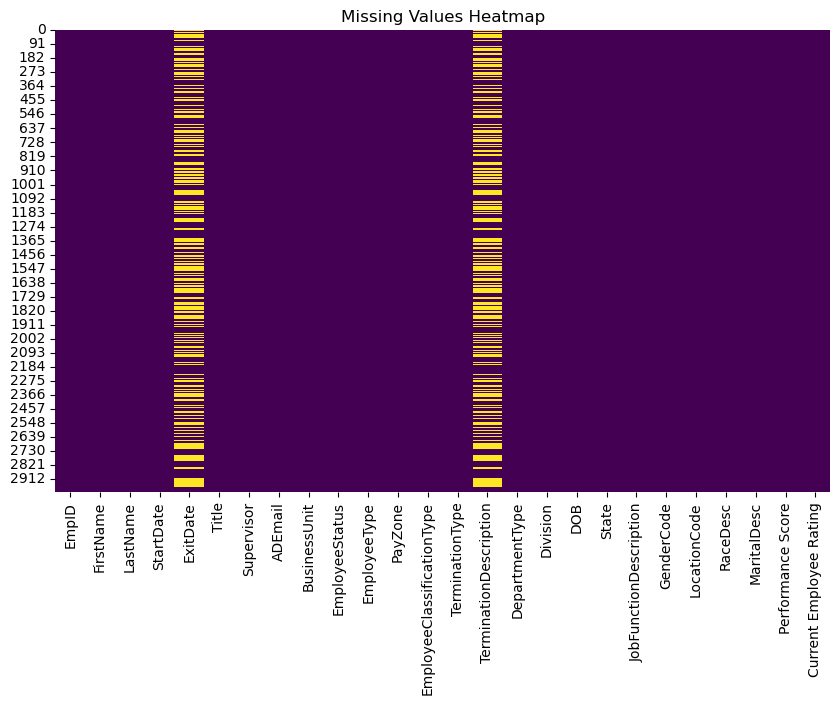

In [7]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 4. Missing Values Analysis

We check for missing values in the dataset and visualize their distribution using a heatmap to understand the extent and pattern of missing data.


In [8]:
# Handling missing values
# For simplicity, we can drop rows with missing values (or impute them depending on the context)
df_cleaned = df.dropna()

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"The dataset contains {duplicates} duplicate rows.")

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()


The dataset contains 0 duplicate rows.


In [10]:
# Convert data types if necessary (example: convert 'date' column to datetime)
df_cleaned['ExitDate'] = pd.to_datetime(df_cleaned['ExitDate'])

# Display the cleaned dataset information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 6 to 2998
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       1533 non-null   int64         
 1   FirstName                   1533 non-null   object        
 2   LastName                    1533 non-null   object        
 3   StartDate                   1533 non-null   object        
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       1533 non-null   object        
 6   Supervisor                  1533 non-null   object        
 7   ADEmail                     1533 non-null   object        
 8   BusinessUnit                1533 non-null   object        
 9   EmployeeStatus              1533 non-null   object        
 10  EmployeeType                1533 non-null   object        
 11  PayZone                     1533 non-null   object      

## 5. Data Cleaning

### Handling Missing Values

We handle missing values by either dropping them or imputing with appropriate values. For this analysis, we drop rows with missing values.

### Removing Duplicates

We check for and remove duplicate rows to ensure data quality.

### Data Type Conversion

If necessary, we convert columns to appropriate data types (e.g., date columns to `datetime`).


<Figure size 1200x600 with 0 Axes>

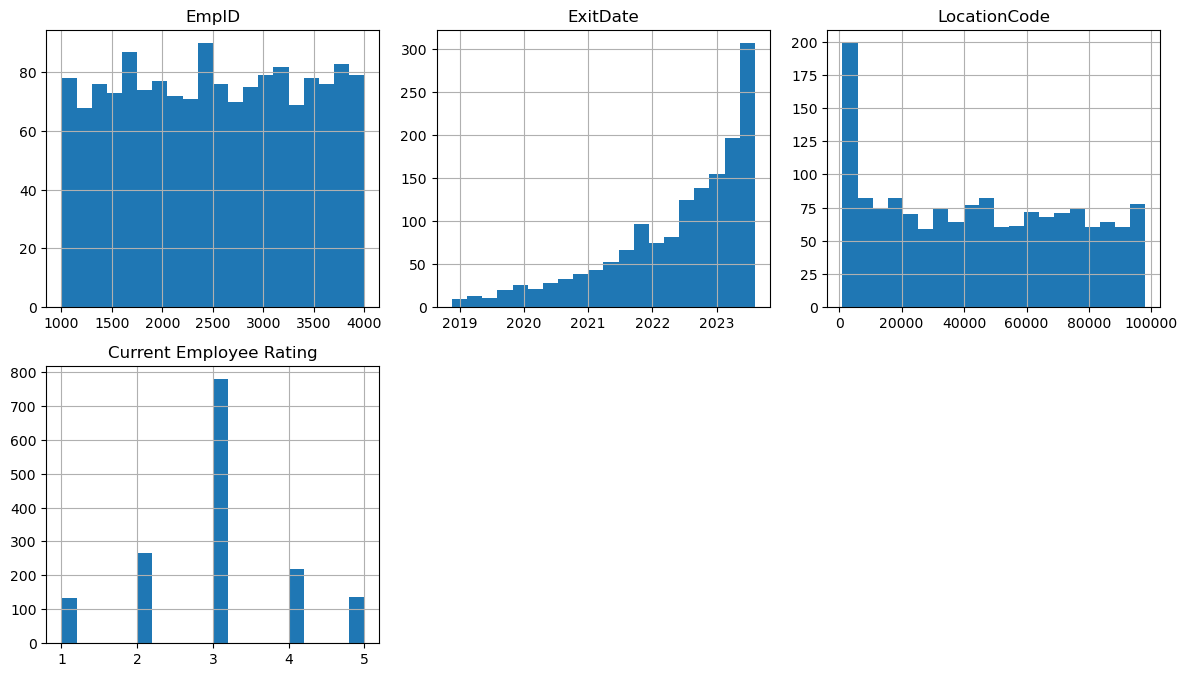

In [11]:
# Distribution of numerical variables
plt.figure(figsize=(12, 6))
df_cleaned.hist(bins=20, figsize=(12, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


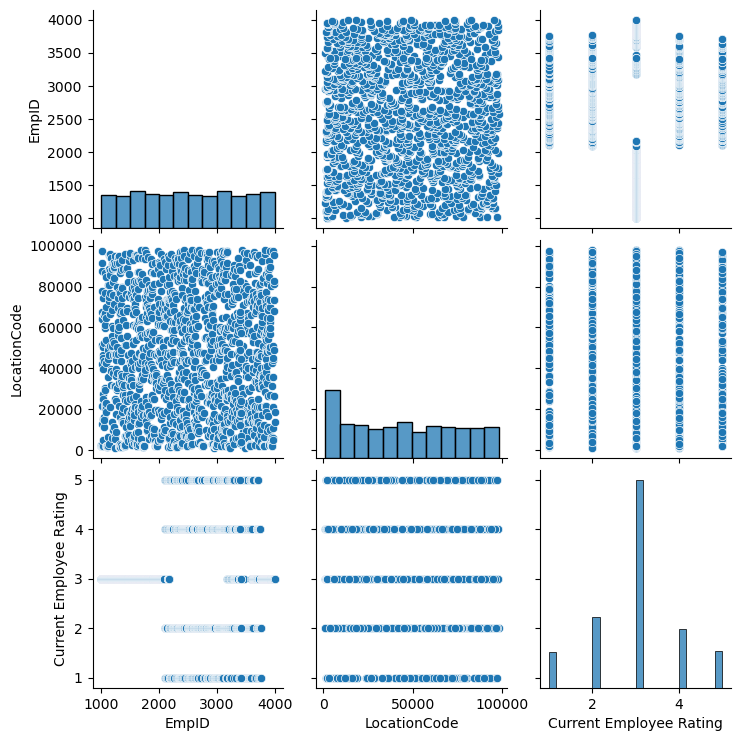

In [12]:
# Relationship between variables (example: scatter plot)
sns.pairplot(df_cleaned)
plt.show()

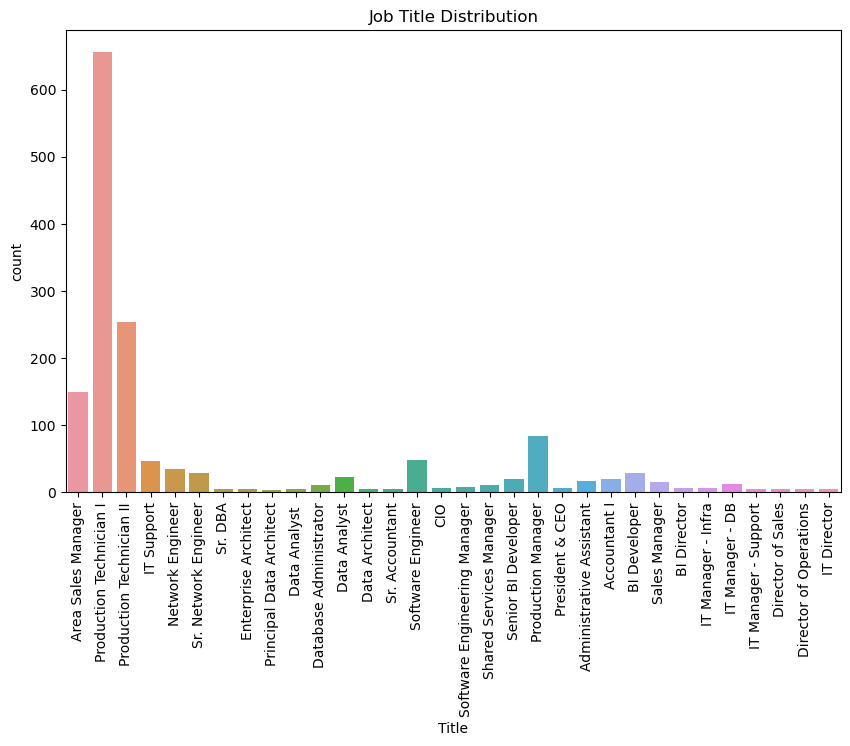

In [16]:
# Categorical variable analysis (example: count plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Title', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Job Title Distribution')
plt.show()

In [15]:
df_cleaned.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

## 6. Data Visualization

### Distribution of Numerical Variables

Histograms are used to visualize the distribution of numerical variables, giving insights into their skewness and spread.

### Relationship Between Variables

Pair plots help in understanding the relationships and distributions between pairs of variables.

### Categorical Variable Analysis

Count plots provide insights into the distribution of categorical variables, such as job titles.


C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\3052606375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_cleaned.corr()


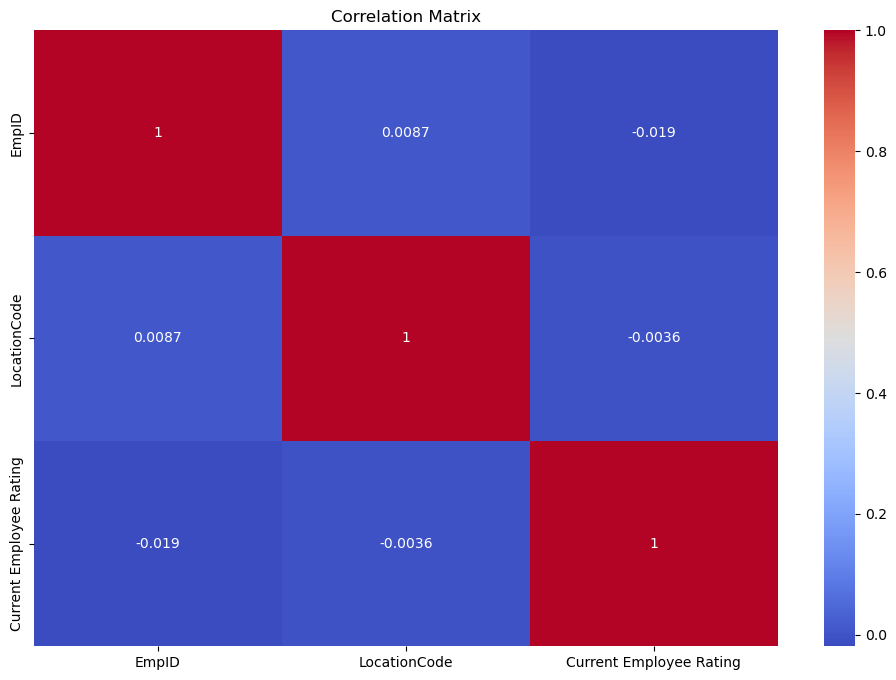

In [17]:
# Calculate correlations
correlations = df_cleaned.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Conclusion

The EDA provided insights into the dataset's structure, distributions, and relationships. Key findings include:

- The dataset has been cleaned of missing values and duplicates.
- Visualization showed patterns and distributions across variables.
